In [9]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# 0 : T-shirt/top, 1 : Trouser, 2 : Pullover, 3 : Dress, 4 : Coat, 5 : Sandal
# 6 : Shirt, 7 : Sneaker, 8 : Bag, 9 : Ankel boot

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [17]:
X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
stoppoint = EarlyStopping(monitor='val_loss', patience=20)

model = Sequential(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2, callbacks=[stoppoint])

Epoch 1/50
240/240 [==============================] - 3s 12ms/step - loss: 0.5521 - accuracy: 0.8065 - val_loss: 0.4326 - val_accuracy: 0.8486
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 0.3999 - accuracy: 0.8583 - val_loss: 0.3951 - val_accuracy: 0.8610
Epoch 3/50
240/240 [==============================] - 3s 12ms/step - loss: 0.3531 - accuracy: 0.8746 - val_loss: 0.3811 - val_accuracy: 0.8698
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 0.3251 - accuracy: 0.8827 - val_loss: 0.3507 - val_accuracy: 0.8778
Epoch 5/50
240/240 [==============================] - 3s 12ms/step - loss: 0.3029 - accuracy: 0.8897 - val_loss: 0.3357 - val_accuracy: 0.8804
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 0.2912 - accuracy: 0.8938 - val_loss: 0.3251 - val_accuracy: 0.8817
Epoch 7/50
240/240 [==============================] - 3s 12ms/step - loss: 0.2721 - accuracy: 0.9001 - val_loss: 0.3217 - val_accuracy: 0.8837

<function matplotlib.pyplot.show(close=None, block=None)>

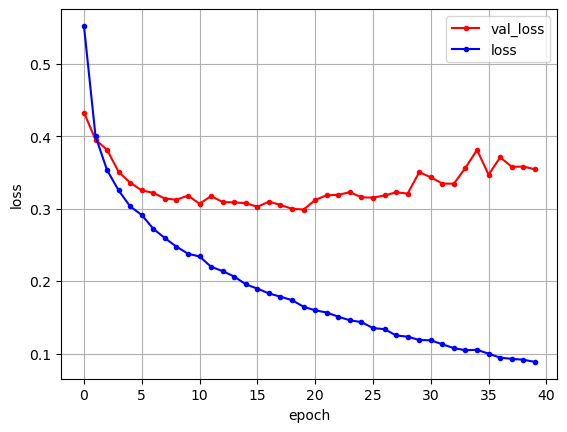

In [34]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

In [21]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8975


In [32]:
from PIL import Image
 
# 이미지 열기
im = Image.open('./data/img/shoose-1.jpg')
# 이미지 크기 출력
print(im.size)
im = im.resize((28, 28))

x = 255 - (np.array(im)[:,:,0]) #  숫자로 변환 시킴
print(x.shape)

(400, 431)
(28, 28)


In [33]:
print(x.shape)
print(model.predict(x))

(28, 28)


ValueError: in user code:

    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\frank\anaconda3\envs\py3.8\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=uint8)
      • training=False
      • mask=None


In [29]:
X_test[0].reshape(1,28, 28)

(1, 28, 28)

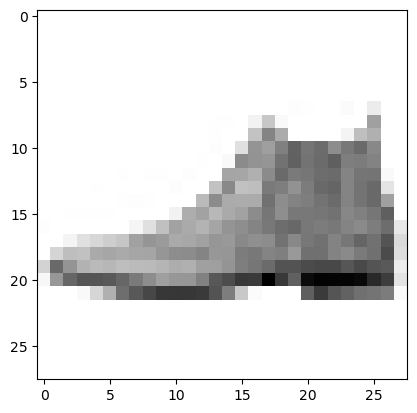

In [31]:
plt.imshow(X_test[0], cmap='Greys')
plt.show()